In [1]:
from utils import load_CIFAR10
import numpy as np
# Load the raw CIFAR-10 data.

# import os
# print(os.getcwd())
# cifar10_dir = '../data/cifar-10-batches-py' 
# print(os.path.abspath(cifar10_dir))

cifar10_dir = '../data/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)     # (50000,32,32,3)
print('Training labels shape: ', y_train.shape)   # (50000L,)
print('Test data shape: ', X_test.shape)        # (10000,32,32,3)
print('Test labels shape: ', y_test.shape)      # (10000L,)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [2]:
print(y_test[1])

8


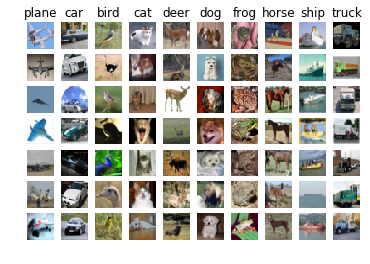

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1#将同一类图片显示在同一列
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
num_training = 40000
num_val = 10000
# num_test = 10000 
idxs = list(range(num_training + num_val))
np.random.shuffle(idxs)
X_train_all = X_train
y_train_all = y_train
X_train = X_train_all[idxs[:num_training]]
y_train = y_train_all[idxs[:num_training]]
X_val = X_train_all[idxs[num_training:]]
y_val = y_train_all[idxs[num_training:]]

In [5]:
print('Training data shape: ', X_train.shape)     
print('Training labels shape: ', y_train.shape) 
print('Val data shape: ', X_val.shape)        
print('Val labels shape: ', y_val.shape)     
print('Test data shape: ', X_test.shape)     
print('Test labels shape: ', y_test.shape)     

Training data shape:  (40000, 32, 32, 3)
Training labels shape:  (40000,)
Val data shape:  (10000, 32, 32, 3)
Val labels shape:  (10000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [6]:
print(type(y_train))
print((y_train[1]))

<class 'numpy.ndarray'>
6


In [7]:
import tensorflow as tf
# reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))    
X_val = np.reshape(X_val, (X_val.shape[0], -1))         
X_test = np.reshape(X_test, (X_test.shape[0], -1))       
# y_train = tf.one_hot(y_train, 10) #10 is the num_class
# y_val = tf.one_hot(y_val, 10)
# y_test = tf.one_hot(y_test,10)
#warning: 这时候X是numpy.array,y是tensor!
# 之后batch_ys = y_train[mask_idxs] 会导致报错，tensorflow.python.framework.errors_impl.InvalidArgumentError: Shape must be rank 1 but is rank 2 for 'strided_slice' (op: 'StridedSlice') with input shapes: [40000,10], [1,30], [1,30], [1].
# 因为要启动session，才能操作tensor。
#因此可以使用numpy进行onehot操作。
y_train = np.eye(num_classes)[y_train]
y_val = np.eye(num_classes)[y_val]
y_test = np.eye(num_classes)[y_test]
print('Training data shape: ', X_train.shape)     
print('Training labels shape: ', y_train.shape) 
print('Val data shape: ', X_val.shape)        
print('Val labels shape: ', y_val.shape)     
print('Test data shape: ', X_test.shape)     
print('Test labels shape: ', y_test.shape)    

Training data shape:  (40000, 3072)
Training labels shape:  (40000, 10)
Val data shape:  (10000, 3072)
Val labels shape:  (10000, 10)
Test data shape:  (10000, 3072)
Test labels shape:  (10000, 10)


In [8]:
print((y_train[1]))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
# subtract the mean image
# mean_image = np.mean(X_train, axis=0)       # (1,3072)
# X_train -= mean_image
# X_val -= mean_image
# X_test -= mean_image

In [10]:
# Visualize the mean image
# plt.figure(figsize=(4, 4))
# plt.imshow(mean_image.reshape((32, 32, 3)).astype('uint8'))
# plt.show()

In [11]:
# Bias trick, extending the data
# X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])    
# X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])          
# X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])  
# print('Training data shape: ', X_train.shape)  
# print('Val data shape: ', X_val.shape)
# print('Test data shape: ', X_test.shape) 
#暂不需要用这个技巧。

In [12]:
# Create the model
x = tf.placeholder(tf.float32, [None, 3072])
# W_1 = tf.Variable(tf.zeros([3072, 30]))
W_1 = tf.get_variable('W_1', [3072, 30], initializer=tf.random_normal_initializer())
# b_1 = tf.Variable(tf.zeros([30]))
b_1 = tf.get_variable('b_1', [30], initializer=tf.random_normal_initializer())
z_1 = tf.matmul(x, W_1) + b_1
a_1 = tf.sigmoid(z_1)

# W_2 = tf.Variable(tf.zeros([30, 10]))
W_2 = tf.get_variable('W_2', [30, 10], initializer=tf.random_normal_initializer())
# b_2 = tf.Variable(tf.zeros([10]))
b_2 = tf.get_variable('b_2', [10], initializer=tf.random_normal_initializer())
z_2 = tf.matmul(a_1, W_2) + b_2
# a_2 = tf.sigmoid(z_2)
a_2 = z_2

In [13]:
# Define loss and optimizer
y = tf.placeholder(tf.float32, [None, 10])
loss = tf.losses.mean_squared_error(y, a_2)
# loss = tf.reduce_mean(tf.norm(y - a_2, axis=1)**2) / 2
#换成交叉熵效果应该会好一点
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [28]:
correct_prediction = tf.equal(tf.argmax(a_2, 1), tf.argmax(y, 1)) #(num_training,1),预测正确为1，反之为0
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # tf.int32 注意tf.int32会导致，acc算出来一直为0，reduce_mean可能要求输入为浮点数
init_op = tf.global_variables_initializer()

# Train
batch_size = 30 
num_epoch = 100
with tf.Session() as sess:
    sess.run(init_op)
    num_train = X_train.shape[0]
    num_batch = int(num_train/batch_size) + 1
    for epoch in range(num_epoch):
        idxs = np.arange(num_train) 
        np.random.shuffle(idxs)
        avg_cost = 0
        for batch_idx in range(num_batch):
            start_idx = batch_idx * batch_size
            end_idx = (batch_idx + 1) * batch_size 
            if end_idx > num_train:
                end_idx = num_train
            mask_idxs =  idxs[start_idx:end_idx]
            batch_xs, batch_ys =  X_train[mask_idxs], y_train[mask_idxs]
            _, c = sess.run([train_step,loss], feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += c / num_batch
        #evaluate
        acc = sess.run(accuracy_op,feed_dict={x: X_val,y: y_val})
        print("Epoch %s training loss: %s, validation acc: %s" % (epoch, avg_cost,acc))
#         print("Epoch %s validation acc: %s " % (epoch, acc))

Epoch 0 training loss: 0.26318674077136084, validation acc: 0.1018
Epoch 1 training loss: 0.10105381104564552, validation acc: 0.0996
Epoch 2 training loss: 0.09562247110784858, validation acc: 0.1051
Epoch 3 training loss: 0.09481414134936711, validation acc: 0.0999
Epoch 4 training loss: 0.0944979408423583, validation acc: 0.0995
Epoch 5 training loss: 0.09407026828943875, validation acc: 0.0971
Epoch 6 training loss: 0.09387198172654891, validation acc: 0.1037
Epoch 7 training loss: 0.09371794439081495, validation acc: 0.0967
Epoch 8 training loss: 0.09355301659057151, validation acc: 0.1031
Epoch 9 training loss: 0.09340980228433182, validation acc: 0.103
Epoch 10 training loss: 0.09329453752986323, validation acc: 0.0995
Epoch 11 training loss: 0.09320469488804474, validation acc: 0.104
Epoch 12 training loss: 0.0930670933711387, validation acc: 0.1026
Epoch 13 training loss: 0.09299058335898863, validation acc: 0.1033
Epoch 14 training loss: 0.09285095341872245, validation acc: 0